# Aula 1

## MovieLens
#### Análise Exploratório dos dados:
##### Organizando e agrupando os dados que serão necessários para o uso.

Notas dadas para filmes.

Fazer o levantamento dos dados e preparar para testar a hipotese.

In [1]:
# Base de dados, Alura_MovieLens:
# https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv
# ou diretemante no MovieLens, base de dados completa:
# https://grouplens.org/datasets/movielens/

In [2]:
import pandas as pd

In [3]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Apresenta a documentação da função.
#filmes?

In [5]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# formato dataframe
avaliacoes.shape

(100836, 4)

In [7]:
# Renomeando as colunas
avaliacoes.columns = ["usuarioId", "filmeId", "media_notas", "momento"]
avaliacoes.head()

,usuarioId,filmeId,media_notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
# Fazendo uma busca e jogando numa variável
avaliacoes_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_filme_1

,usuarioId,filmeId,media_notas,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [9]:
# Visão geral do dataframe
avaliacoes.describe()

,usuarioId,filmeId,media_notas,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
avaliacoes["media_notas"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: media_notas, Length: 100836, dtype: float64

In [11]:
# Describe de uma busca, pode jogar a query numa variavel
#avaliacoes.query("filmeId==1").describe()
avaliacoes_filme_1.describe()

,usuarioId,filmeId,media_notas,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [12]:
# Buscando a média de apenas uma coluna
#avaliacoes.query("filmeId==1")["nota"].mean()
avaliacoes_filme_1

,usuarioId,filmeId,media_notas,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


# Agrupando pelo Id

In [13]:
# Extraindo a média da coluna nota
notas_medias_por_filme = avaliacoes.groupby("filmeId")["media_notas"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: media_notas, dtype: float64

In [14]:
# Juntando os dados, de um mesmo dataframe de diferentes colunas
# Criando uma nova coluna e assumindo que a ordem é a mesma e os dados batem
# mas se o dataset alterar e não possuir a mesma ordem, não vai funcionar.
#filmes["nota_media"] = notas_medias_por_filme
#filmes.head()

### Desafio 1:
Encontre os 18 filmes que não tiveram avaliação

In [15]:
# Usando o Join para juntar dataframes
# Do dataframe notas_medias_por_filme com filmeId 
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media

,filmeId,titulo,generos,media_notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [16]:
# Ordenando pela media das notas (do menor para o maior)
# ascending - False, porque quero decrescente
# sort_index pelo índice ou sort_values por qualquer uma coluna
filmes_com_media.sort_values("media_notas", ascending=False)

# NaN ou sem notas, ficaram para o final

,filmeId,titulo,generos,media_notas
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [17]:
filmes_com_media.sort_values("media_notas", ascending=False).head(15)

,filmeId,titulo,generos,media_notas
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


In [18]:
# Plotando
# Não usar esse, porque te dará uma visão errada da média das notas
# e sua distribuição.
# avaliacoes.query("filmeId in [1,2,102084]").plot()

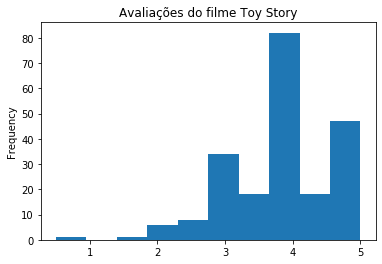

In [19]:
# refinando com matplot
import matplotlib.pyplot as plt
# Plotando num histograma a distribuição do filme 1 da coluna media_notas
# pois somente a nota ou a média delas pode não refeltir a verdade
# porque depende do conjunto (número de notas), em seu escopo.
avaliacoes.query("filmeId == 1")["media_notas"].plot(kind="hist")
plt.title("Avaliações do filme Toy Story")
plt.show()

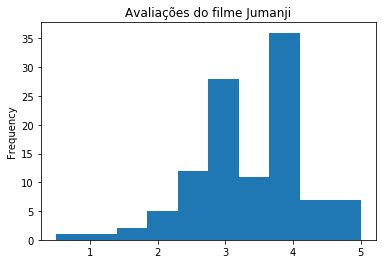

In [20]:
# Plotando a distribuição do filme dois
avaliacoes.query("filmeId == 2")["media_notas"].plot(kind="hist", title="Avaliações do filme Jumanji")
plt.show()

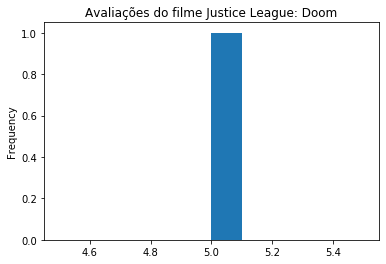

In [21]:
# Esse filme teve apenas um voto, o que cria um viés para a sua avaliação
avaliacoes.query("filmeId == 102084")["media_notas"].plot(kind="hist")
plt.title("Avaliações do filme Justice League: Doom")
plt.show()

# Aula 2
### Médias, medianas e visualização de dados

Separando/quebrando os generos do dataframe filmes

In [22]:
# Como estão em String, vamos usar a funções do pandas, vamos separa-las
# Existem vários jeitos de quebrar no pandas, depende da sua necessidade

# str.get_dummies() - quebra as Strings, criando várias variáveis
# dummies, conta quais variáveis(String) apareceram em cada linha
# sum() - somando pode somar tanto as colunas, quanto as linhas - pardão coluna
# pode usar .sum(axis=1) para mudar o eixo
# .value_counts() - conta quantos tem em cada
filmes["generos"].str.get_dummies("|").sum(axis=1).value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64

In [23]:
filmes["generos"].str.get_dummies("|").sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [24]:
# Ordenando os valores dos gêneros
# em decrescente
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [25]:
# Só temos uma coluna, o nome dos filmes é um índice/cabeçalho
# Extraindo variáveis dummies
# sort_index() - ordena o índice
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [26]:
# Só o os valores
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34], dtype=int64)

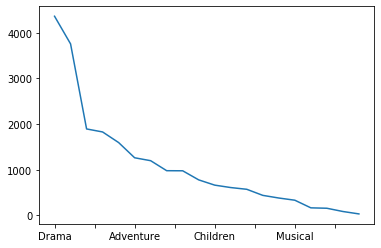

In [27]:
# Plotando
# esse gráfico não serve, porque são categorias não agurapdas
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).plot()

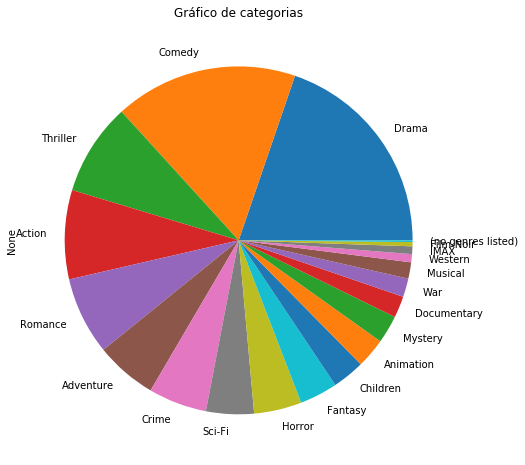

In [28]:
# NÃO UTILIZE ESSE GRÁFICO - nenhum que tenha nome do comida

# Como são categorias, plotando de pizza
# Esse gráfico não ficou muito apresentável, difícil de comprar e repete cores
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).plot(
    kind="pie", title="Gráfico de categorias", figsize=(8,8))
plt.show() # mostra somente o que interessa no gráfico

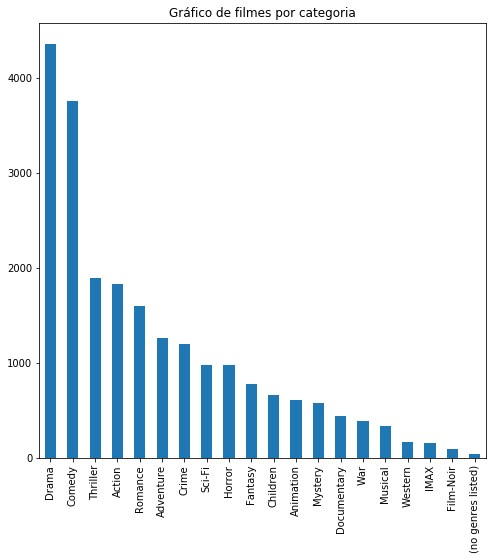

In [29]:
# Gráfico de barras
filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False).plot(
    kind="bar", title="Gráfico de filmes por categoria", figsize=(8,8))
plt.show()

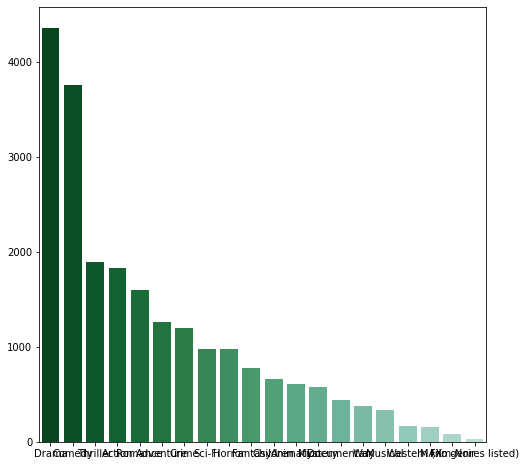

In [30]:
# Usando Seaborn para melhorar o gráfico
# Seaborn tem esquemas de palettes
import seaborn as sns

filmes_por_genero = filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(8,8)) # x,y
# Usando gráfico de paletas
# x e y são eixos do gráfico
sns.barplot(x=filmes_por_genero.index,
           y=filmes_por_genero.values,
            # usando uma paleta de cores, onde n é o núemro de elementos
            # BuGn_r - tipo de cor | n_colors - cor para len() os generos dos filmes + 2 para escurecer
           palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 8))
plt.show()

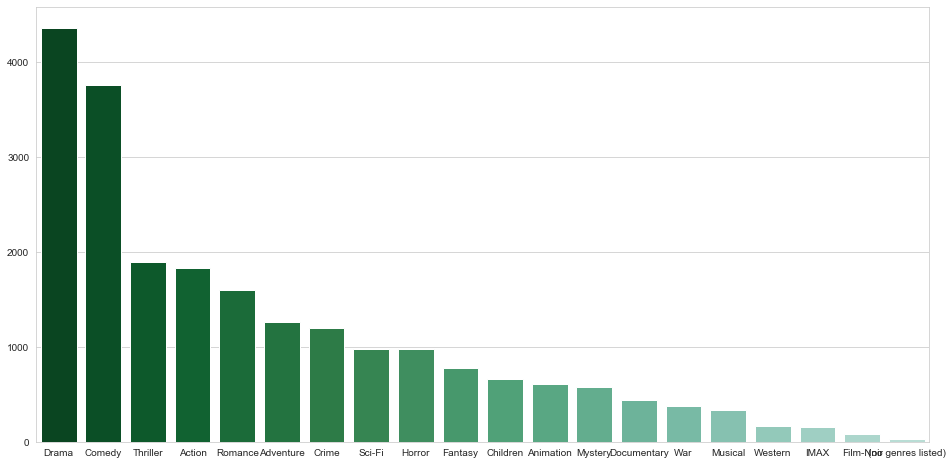

In [31]:
# Procurar Seaborn Styling dor barplot - para configurar o gráfico
sns.set_style("whitegrid") # adicionando estilo, fica global
filmes_por_genero = filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(16,8)) # x,y
# Usando gráfico de paletas
# x e y são eixos do gráfico
sns.barplot(x=filmes_por_genero.index,
           y=filmes_por_genero.values,
            # usando uma paleta de cores, onde n é o núemro de elementos
            # BuGn_r - tipo de cor | n_colors - cor para len() os generos dos filmes + 2 para escurecer
           palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 8))
plt.show()

3.9209302325581397


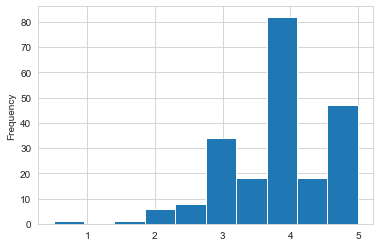

In [32]:
notas_filme_1 = avaliacoes.query("filmeId == 1")["media_notas"]
print(notas_filme_1.mean())
notas_filme_1.plot(kind="hist")

3.4318181818181817


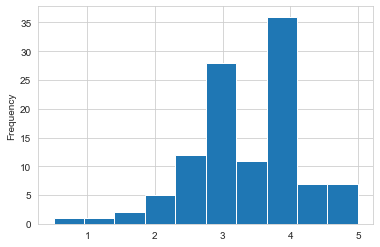

In [33]:
notas_filme_2 = avaliacoes.query("filmeId == 2")["media_notas"]
print(notas_filme_2.mean())
notas_filme_2.plot(kind="hist")

In [34]:
notas_filme_2.describe()
# Entre filme 1 e 2
# Médias se concentram em pontos diferentes nos dois filmes
# Com quantidade diferentes de votos
# e a distibuição normal, (25%, 50% e 75%) 
# mostra uma realidade bem diferente da concentração de votos

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: media_notas, dtype: float64

In [35]:
notas_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: media_notas, dtype: float64

In [36]:
avaliacoes.groupby("filmeId").mean()

,usuarioId,media_notas,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [37]:
# Pegando valores que não são head nem tail
filmes_com_media.sort_values("media_notas", ascending=False)[2450:2500]

,filmeId,titulo,generos,media_notas
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [38]:
# Função, passando um filme N como parâmetro - f interpolação
# uma função não retorna nada, para ter o describe(), colocar o return
# Param pelo filmeId
def plot_filme(n):
    notas_filme = avaliacoes.query(f"filmeId =={n}")["media_notas"]
    notas_filme.plot(kind="hist")
    return notas_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: media_notas, dtype: float64

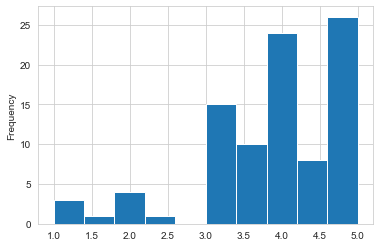

In [39]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: media_notas, dtype: float64

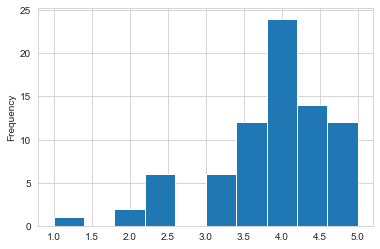

In [40]:
plot_filme(46578)

In [41]:
# Boxplot - gráfico para comprar dados
def plot_filme(n):
    notas_filme = avaliacoes.query(f"filmeId =={n}")["media_notas"]
    notas_filme.plot(kind="hist")
    plt.show() # primero gráfico
    notas_filme.plot.box()
    plt.show() # segundo gráfico
    return notas_filme.describe()

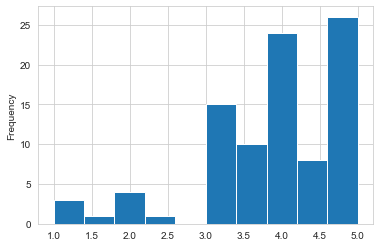

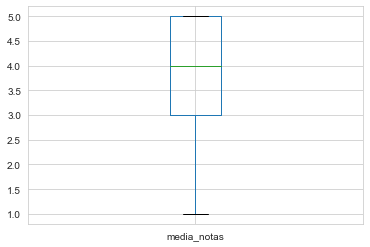

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: media_notas, dtype: float64

In [42]:
# Boxplot
# Linhas pretas - cima max, baixo min
# linha verde no meio do quadrado - mediana
# lbolinhas após linhas pretas - outliers
# parte baixo do quadrade - os 25% da distribuição
# parte cima do quadrade - os 75% da distribuição
# 50% das notas está entre 3 e 5 (caixa maior), a mediana (linha do meio é 4)
plot_filme(919)

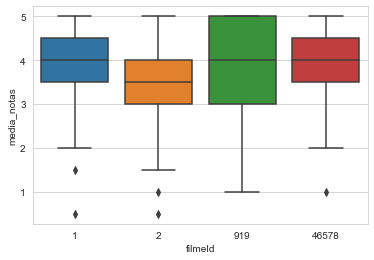

In [43]:
# Plotando mais de um gráfico com Seaborn e Boxplot
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="media_notas")

## Aula 3
#### Correlação e Exploração de Dados

In [44]:
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [45]:
# Apresentando os valores da coluna color
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [46]:
# Quantidade de valores da coluna, por categoria
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [47]:
# % de cada categoria
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [48]:
# Agrupa e conta quantos atributos temos da categoria escolhida
# Quantos filmes cada diretor fez
imdb["director_name"].value_counts()

Steven Spielberg      26
Woody Allen           22
Clint Eastwood        20
Martin Scorsese       20
Ridley Scott          17
                      ..
Marc F. Adler          1
Jonathan Kesselman     1
Conor McPherson        1
Laslo Benedek          1
Wallace Wolodarsky     1
Name: director_name, Length: 2398, dtype: int64

In [49]:
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [50]:
imdb["num_critic_for_reviews"].min()

1.0

In [51]:
# Describe - estatística descritiva
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

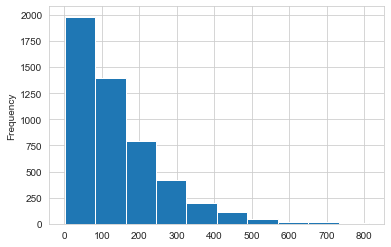

In [52]:
# Plotando a distribuição da categoria
imdb["num_critic_for_reviews"].plot(kind="hist")
plt.show()

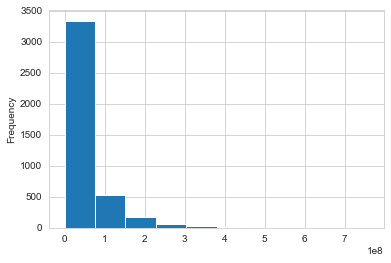

In [53]:
# Histograma de quanto cada filme faturou - 1e8 - casa dos milhões
imdb["gross"].plot(kind="hist")
plt.show()

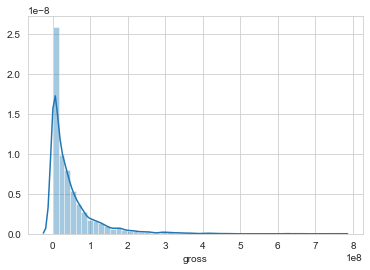

In [54]:
# Histograma do Seaborn
sns.distplot(imdb["gross"])

In [55]:
# Ordenando pelo valor dos que tiveram a maior receita/coluna gross
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [56]:
# Pega uma amostragem
imdb.sort_values("gross", ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2080,Color,Russell Crowe,183.0,111.0,0.0,234.0,Ryan Corr,523.0,4190530.0,Drama|War,...,185.0,English,Australia,R,22500000.0,2014.0,468.0,7.1,2.35,18000
4632,Color,Ralph Nelson,32.0,103.0,17.0,113.0,Dick Van Patten,754.0,NaN,Drama|Romance|Sci-Fi,...,55.0,English,USA,PG,NaN,1968.0,605.0,7.1,2.35,785
1821,Color,Christian Alvart,167.0,109.0,22.0,355.0,Callum Rennie,14000.0,13248477.0,Horror|Mystery|Thriller,...,174.0,English,USA,R,27000000.0,2009.0,716.0,6.2,2.35,0
4880,Color,Sam Martin,1.0,66.0,0.0,0.0,Steve Duin,0.0,NaN,Documentary,...,1.0,English,USA,PG,250000.0,2013.0,0.0,7.8,NaN,53
1939,Color,Bobby Farrelly,62.0,117.0,101.0,743.0,Lin Shaye,13000.0,24944213.0,Comedy|Sport,...,185.0,English,USA,PG-13,27000000.0,1996.0,852.0,6.9,2.35,3000
1106,Color,Curtis Hanson,42.0,111.0,161.0,132.0,Glenn Morshower,11000.0,46815748.0,Action|Adventure|Crime|Thriller,...,69.0,English,USA,PG-13,45000000.0,1994.0,894.0,6.3,2.35,0
563,Color,Kyle Balda,308.0,91.0,22.0,1000.0,Jon Hamm,7000.0,336029560.0,Action|Animation|Comedy|Family|Sci-Fi,...,275.0,English,USA,PG,74000000.0,2015.0,4000.0,6.4,1.85,70000
4933,Color,Michel Orion Scott,29.0,93.0,0.0,2.0,Rowan Isaacson,58.0,155984.0,Documentary,...,9.0,English,USA,Unrated,160000.0,2009.0,2.0,7.4,1.85,0
4622,Color,Michael Taliferro,NaN,138.0,105.0,110.0,Sticky Fingaz,592.0,NaN,Comedy|Music,...,1.0,English,USA,PG-13,1000000.0,2009.0,207.0,3.4,NaN,41
3750,Color,John Erick Dowdle,203.0,103.0,66.0,13.0,Claire Geare,155.0,27285953.0,Action|Thriller,...,214.0,English,USA,R,5000000.0,2015.0,78.0,6.8,1.85,16000


 ### Questões a serem respondidas
 
 - aventura tem nota melhor que comédia?
 - diretor com mais filmes tem nota melhor? tem mais faturamento?
 - as respostas são específicas para a amostra ou para o mundo?
 - quais correlações existem entre os dados?
 - budget x gross (orçamento x faturamento) - quem gasta mais ganha mais?
 - title_year com algo?

1) diretor com mais filmes tem nota melhor? tem mais faturamento?

In [57]:
# Coloriado ou não colorido

# Removendo os filmes que não possuem valores - pandas.DataFrame.dropna, retira os valores NaN
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len(color_or_bw)

5024

In [58]:
# Criando uma coluna color_0_ou_1 e atribuindo os valores se são iguais ao atributo color
# Tendo o valor Color, na coluna color será igual a True, se for false vale 0
# se for verdadeiro multiplica por 1
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw.head()

C:\Users\luisg\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [59]:
# 1 - Colorido
# 0 - Preto e Branco
color_or_bw["color_0_ou_1"].value_counts()

1    4815
0     209
Name: color_0_ou_1, dtype: int64

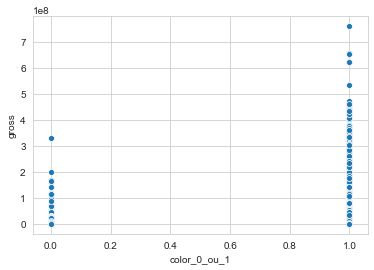

In [60]:
# Pegando o conjunto de dados color_or_bw
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")
plt.show()

In [61]:
# Agrupando a color e vendo a média de gross
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [62]:
# Vendo a nota
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [63]:
# Mediana
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

In [64]:
# Apagando qualquer valor NaN das duas colunas
imdb[["budget", "gross"]].dropna()

,budget,gross
0,237000000.0,760505847.0
1,300000000.0,309404152.0
2,245000000.0,200074175.0
3,250000000.0,448130642.0
5,263700000.0,73058679.0
...,...,...
5033,7000.0,424760.0
5034,7000.0,70071.0
5035,7000.0,2040920.0
5037,9000.0,4584.0


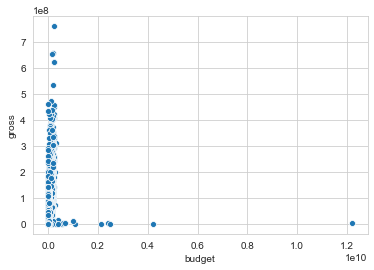

In [65]:
budget_gross = imdb[["budget", "gross"]].dropna()
sns.scatterplot(x="budget", y="gross", data = budget_gross)
plt.show()

# Problema da escala, alterar para escola logarítmica 
# E os valores não estão especificados

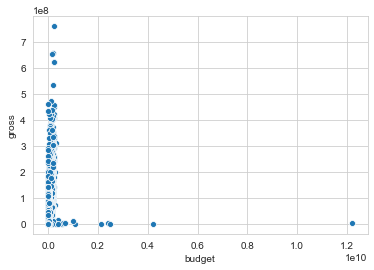

In [66]:
# Tirando os valores ZERO
budget_gross = imdb[["budget", "gross"]].dropna().query("budget > 0 or gross > 0")
sns.scatterplot(x="budget", y="gross", data = budget_gross)
plt.show()

# Precisa converter os valores de cada budget para dolar!
# Pois cada país (na época do filme), tinha uma cotação diferente

In [67]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [68]:
# Precisa converter os valores de cada budget para dolar!
# Pois cada país (na época do filme), tinha uma cotação diferente
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [69]:
# Removendo Linhas Duplicados
imdb = imdb.drop_duplicates()

In [70]:
# Por isso vamos pegar apenas os filmes do USA
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


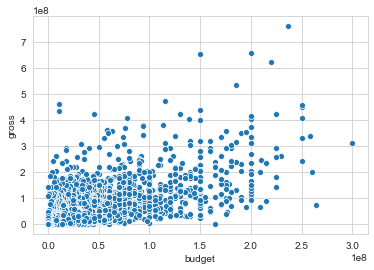

In [71]:
# Plotando
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget > 0 or gross > 0")
sns.scatterplot(x="budget", y="gross", data = budget_gross)
plt.show()

C:\Users\luisg\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


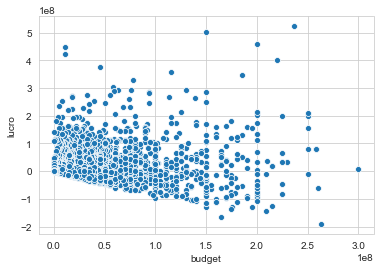

In [72]:
# Relação Lucro / Prejuízo

# Criando uma coluna lucro (gross - budget)
# Feature engineer - criar uma nova coluna/variável
imdb_usa["lucro"] = imdb_usa["gross"] - imdb_usa["budget"]

# Query das colunas, que são maior que zero e dropna
budget_lucro = imdb_usa.query("budget > 0 | gross > 0")[["budget", "lucro"]].dropna()

# Gráfico
sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
plt.show()

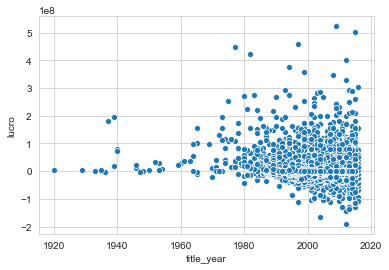

In [73]:
# Lucro / Ano

# Query das colunas, que são maior que zero e dropna
lucro_ano = imdb_usa.query("budget > 0 | gross > 0")[["title_year", "lucro"]].dropna()

# Gráfico
sns.scatterplot(x="title_year", y="lucro", data=lucro_ano)
plt.show()

Diretores que tiveram maior lucro

In [74]:
# Diretores por filme
# Funciona - índice de diretores, valor são os filmes
filmes_por_diretor = imdb_usa["director_name"].value_counts()
filmes_por_diretor.head()

Steven Spielberg    24
Martin Scorsese     20
Clint Eastwood      20
Woody Allen         18
Tim Burton          16
Name: director_name, dtype: int64

In [75]:
# Confirmando o nome da series para usar no join
imdb_usa["director_name"].name

'director_name'

In [76]:
# é possível renomear as colunas direto no join, no final coloca o seguinte 
# .rename(columns={"gross": 'dindin',"director_name": "qtd_filmes"})
# set_index (nomeia o index) - já existe a coluna director_name, tanto na serie, quanto no dataframe
# Por isso mudamos o nome do índice
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
# Reset do index para ficar direito
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


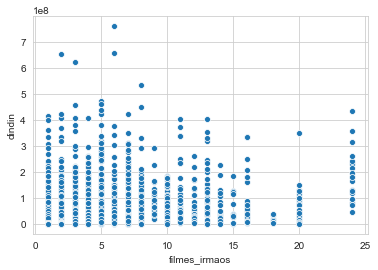

In [77]:
# Gráfico
sns.scatterplot(x="filmes_irmaos", y="dindin", data=gross_director)
plt.show()

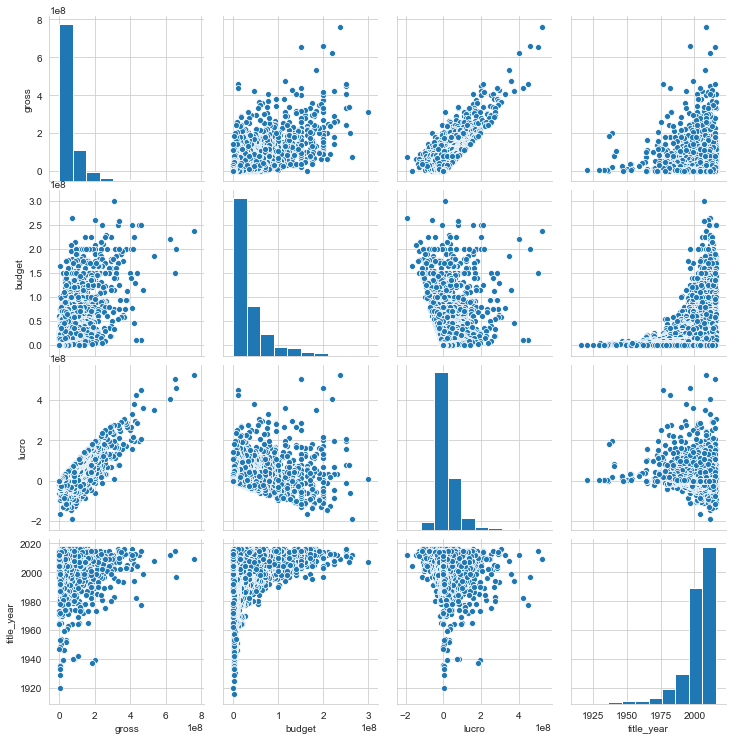

In [80]:
# PairPlot - Plot várias variáveis para tentar entender o relacionamento das variáveis
# esse plot é customizável
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])
plt.show()

In [79]:
# Correlação
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000
